In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
path = "C:/Users/mukib/003 Data-Viz-with-Matplotlib-Seaborn/Data Viz with Matplotlib & Seaborn/Data/housing_data.csv"

housing_original = pd.read_csv(path,
                              parse_dates=["period_begin", "period_end"],
                              dtype={"total_homes_sold" : "Int32", "region_name" : "category"})

In [9]:
housing_original.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,<NA>,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12,54.0,55.0,151.2,158062.5,38.300000


In [11]:
housing_original.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622339 entries, 0 to 622338
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   region_name               622339 non-null  category      
 1   period_begin              622339 non-null  datetime64[ns]
 2   period_end                622339 non-null  datetime64[ns]
 3   total_homes_sold          567839 non-null  Int32         
 4   inventory                 616247 non-null  float64       
 5   active_listings           616905 non-null  float64       
 6   age_of_inventory          616247 non-null  float64       
 7   median_active_list_price  616513 non-null  float64       
 8   months_of_supply          561319 non-null  float64       
dtypes: Int32(1), category(1), datetime64[ns](2), float64(5)
memory usage: 37.6 MB


In [13]:
housing_original.describe().round()

,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
count,622339,622339,567839.0,616247.0,616905.0,616247.0,616513.0,561319.0
mean,2019-09-16 13:42:35.700992512,2019-12-08 13:42:35.700992512,465.0,415.0,455.0,77.0,271213.0,19.0
min,2017-01-02 00:00:00,2017-03-26 00:00:00,1.0,1.0,1.0,0.0,1258.0,0.0
25%,2018-05-21 00:00:00,2018-08-12 00:00:00,17.0,18.0,19.0,49.0,140604.0,10.0
50%,2019-09-23 00:00:00,2019-12-15 00:00:00,77.0,79.0,85.0,68.0,203858.0,15.0
75%,2021-01-18 00:00:00,2021-04-11 00:00:00,344.0,312.0,341.0,93.0,296041.0,23.0
max,2022-04-25 00:00:00,2022-07-17 00:00:00,24385.0,23357.0,25012.0,365.0,999999998.0,1849.0
std,NaN,NaN,1217.0,1176.0,1278.0,43.0,4375623.0,30.0


In [16]:
calefornia_housing = housing_original.loc[
    (housing_original["region_name"].str.contains("CA"))
].assign(region_name=housing_original["region_name"].str[0:-11])

In [17]:
calefornia_housing.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 15228 entries, 6 to 622302
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   region_name               15228 non-null  object        
 1   period_begin              15228 non-null  datetime64[ns]
 2   period_end                15228 non-null  datetime64[ns]
 3   total_homes_sold          14841 non-null  Int32         
 4   inventory                 15217 non-null  float64       
 5   active_listings           15218 non-null  float64       
 6   age_of_inventory          15217 non-null  float64       
 7   median_active_list_price  15208 non-null  float64       
 8   months_of_supply          14829 non-null  float64       
dtypes: Int32(1), datetime64[ns](2), float64(5), object(1)
memory usage: 1.8 MB


In [18]:
calefornia_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,Sacramento,2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
164,Nevada,2018-09-03,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607
252,Stanislaus,2017-06-05,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632
293,Tehama,2020-01-20,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228
304,Stanislaus,2017-11-13,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362


In [22]:
calefornia_housing_pivot = calefornia_housing.pivot_table(index="period_begin",
                                                         columns = "region_name",
                                                         values = "median_active_list_price").assign(
                                                         CA_average = lambda x: x.mean(axis=1))

In [23]:
calefornia_housing_pivot.head()

region_name,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,El Dorado,Fresno,Glenn,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba,CA_average
period_begin,,,,,,,,,,,,,,,,,,,,,
2017-01-02,730602.5,317541.6,408570.6,291315.3,503458.3,339075.0,603901.2,557404.1,251850.0,237145.8,...,300302.0,257172.9,241695.8,374187.5,225395.8,493908.3,661054.7,447859.2,326833.3,492258.437736
2017-01-09,736230.0,324125.0,408566.4,292348.2,517645.8,340291.6,610701.2,563658.3,253016.6,237145.8,...,301900.0,264609.3,243979.1,368312.5,227729.1,449816.6,662463.1,449942.5,336129.1,493710.639623
2017-01-16,742021.6,330708.3,408483.2,293514.9,524108.3,340291.6,616534.5,565908.3,254187.5,237841.6,...,303858.3,270795.8,246266.6,363729.1,229060.4,412975.0,664828.6,453525.8,345425.0,495369.416981
2017-01-23,748271.7,341458.3,408404.0,294619.1,536408.3,341958.3,621617.8,567158.3,255854.1,238041.6,...,306350.0,274861.4,248141.6,360437.5,229806.2,373483.3,666362.5,456875.8,354720.8,497191.662264
2017-01-30,753938.4,355541.6,407079.0,295527.4,543704.1,344041.6,625516.2,567533.3,258000.0,238125.0,...,308191.6,279764.5,249762.5,360250.0,230139.5,333991.6,668787.5,458300.8,364016.6,499286.207547


In [25]:
graving_some = calefornia_housing_pivot.loc[:, ["San Francisco",
                                               "Los Angeles",
                                               "San Diego",
                                               "CA_average"]]
graving_some.head(10)

region_name,San Francisco,Los Angeles,San Diego,CA_average
period_begin,,,,
2017-01-02,1229018.7,611561.0,618570.8,492258.437736
2017-01-09,1233393.7,614061.0,621737.5,493710.639623
2017-01-16,1239977.0,617311.0,625820.8,495369.416981
2017-01-23,1247977.0,620644.3,629491.6,497191.662264
2017-01-30,1253310.4,624541.6,632824.0,499286.207547
2017-02-06,1258643.7,628700.0,636571.9,500903.747170
2017-02-13,1265083.3,632445.8,639080.2,502455.467925
2017-02-20,1273083.3,635487.5,641163.5,504475.215094
2017-02-27,1281000.0,638070.8,643746.9,506523.530189


C:\Users\mukib\AppData\Local\Temp\ipykernel_11008\2158849969.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


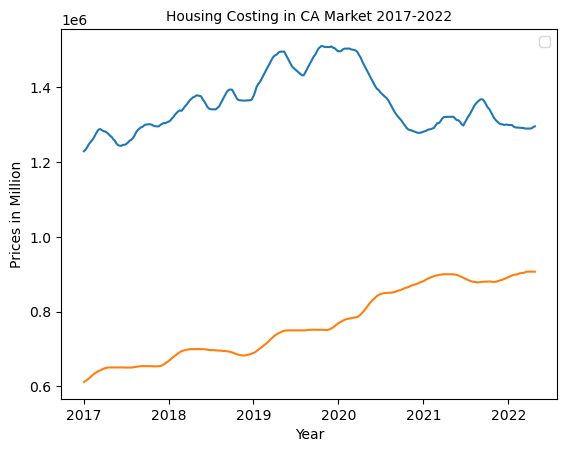

In [32]:
fig, ax = plt.subplots()
ax.plot(graving_some["San Francisco"])
ax.plot(graving_some["Los Angeles"])


ax.set_title("Housing Costing in CA Market 2017-2022", fontsize = 10)
ax.set_xlabel("Year")
ax.set_ylabel("Prices in Million")
ax.legend()